In [2]:
import openfermionpyscf as ofpyscf
import openfermion as of
import cirq
import openfermioncirq as ofc
import numpy as np
import pyscf

In [3]:
from openfermion.transforms import get_fermion_operator, jordan_wigner, bravyi_kitaev
geometry = [["H", [0, 0, 0]],
            ["H", [0, 0, 0.7414]]]
basis = "sto-3g"
multiplicity = 1
charge = 0
hamiltonian = ofpyscf.generate_molecular_hamiltonian(geometry, basis, multiplicity, charge)
hamiltonian_bk=bravyi_kitaev(get_fermion_operator(hamiltonian))

In [4]:
from openfermion.hamiltonians import MolecularData
molecule = MolecularData(geometry, basis, multiplicity, charge)
h2_molecule = ofpyscf.run_pyscf(molecule, run_mp2=True, run_cisd=True, run_ccsd=True, run_fci=True)
elektron=h2_molecule.n_electrons
orbitals = h2_molecule.n_orbitals
qubit= h2_molecule.n_qubits

In [5]:
from openfermion.utils import uccsd_singlet_generator
initial_amplitudes = np.linspace(0,0.05677,2)
#membuat ansatz UCCSD
uccsd_fermion=uccsd_singlet_generator(initial_amplitudes,qubit,elektron)
print(uccsd_fermion)

-0.05677 [0^ 2 1^ 3] +
-0.05677 [1^ 3 0^ 2] +
0.05677 [2^ 0 3^ 1] +
0.05677 [3^ 1 2^ 0]


In [6]:
# ansatz dirubah dari fermion operator menjadi qubit operator
uccsd_bk=bravyi_kitaev(uccsd_fermion)
print(uccsd_bk)

-0.0141925j [X0 Z1 Y2] +
-0.0141925j [X0 Z1 Y2 Z3] +
-0.0141925j [X0 Y2] +
-0.0141925j [X0 Y2 Z3] +
0.0141925j [Y0 Z1 X2] +
0.0141925j [Y0 Z1 X2 Z3] +
0.0141925j [Y0 X2] +
0.0141925j [Y0 X2 Z3]


In [7]:
class Ansatz(ofc.VariationalAnsatz):
    def params(self):
        '''Parameter of the ansatz'''
        return [cirq.Symbol('theta_0'),cirq.Symbol('theta_1')]
    def operations(self, qubits):
        '''Ansatz Prosedur'''
        q0, q1, q2, q3 = qubits
        yield cirq.H(q0)
        yield cirq.XPowGate(exponent=1.5707963267948966).on(q2)
        yield cirq.CNOT(q0,q1),cirq.CNOT(q1,q2)
        yield cirq.ZPowGate(exponent=cirq.Symbol('theta_0')).on(q2)
        yield cirq.CNOT(q1,q2),cirq.CNOT(q0,q1)
        yield cirq.H(q0)
        yield cirq.XPowGate(exponent=-1.5707963267948966).on(q2)
         
        yield cirq.H(q0)
        yield cirq.XPowGate(exponent=1.5707963267948966).on(q2)
        yield cirq.CNOT(q0,q1),cirq.CNOT(q1,q2),cirq.CNOT(q2,q3)
        yield cirq.ZPowGate(exponent=cirq.Symbol('theta_0')).on(q3)
        yield cirq.CNOT(q2,q3),cirq.CNOT(q1,q2),cirq.CNOT(q0,q1)
        yield cirq.H(q0)
        yield cirq.XPowGate(exponent=-1.5707963267948966).on(q2)
        
        yield cirq.H(q0)
        yield cirq.XPowGate(exponent=1.5707963267948966).on(q2)
        yield cirq.CNOT(q0,q2)
        yield cirq.ZPowGate(exponent=cirq.Symbol('theta_0')).on(q2)
        yield cirq.CNOT(q0,q2)
        yield cirq.H(q0)
        yield cirq.XPowGate(exponent=-1.5707963267948966).on(q2)
        
        yield cirq.H(q0)
        yield cirq.XPowGate(exponent=1.5707963267948966).on(q2)
        yield cirq.CNOT(q0,q2),cirq.CNOT(q2,q3)
        yield cirq.ZPowGate(exponent=cirq.Symbol('theta_0')).on(q3)
        yield cirq.CNOT(q2,q3),cirq.CNOT(q0,q2)
        yield cirq.H(q0)
        yield cirq.XPowGate(exponent=-1.5707963267948966).on(q2)
        
        
        yield cirq.XPowGate(exponent=1.5707963267948966).on(q0)
        yield cirq.H(q2)
        yield cirq.CNOT(q0,q1),cirq.CNOT(q1,q2)
        yield cirq.ZPowGate(exponent=cirq.Symbol('theta_1')).on(q2)
        yield cirq.CNOT(q1,q2),cirq.CNOT(q0,q1)
        yield cirq.XPowGate(exponent=-1.5707963267948966).on(q0)
        yield cirq.H(q2)
        
        yield cirq.XPowGate(exponent=1.5707963267948966).on(q0)
        yield cirq.H(q2)
        yield cirq.CNOT(q0,q1),cirq.CNOT(q1,q2),cirq.CNOT(q2,q3)
        yield cirq.ZPowGate(exponent=cirq.Symbol('theta_1')).on(q3)
        yield cirq.CNOT(q2,q3),cirq.CNOT(q1,q2),cirq.CNOT(q0,q1)
        yield cirq.XPowGate(exponent=-1.5707963267948966).on(q0)
        yield cirq.H(q2)
        
        yield cirq.XPowGate(exponent=1.5707963267948966).on(q0)
        yield cirq.H(q2)
        yield cirq.CNOT(q0,q2)
        yield cirq.ZPowGate(exponent=cirq.Symbol('theta_1')).on(q2)
        yield cirq.CNOT(q0,q2)
        yield cirq.XPowGate(exponent=-1.5707963267948966).on(q0)
        yield cirq.H(q2)
        
        yield cirq.XPowGate(exponent=1.5707963267948966).on(q0)
        yield cirq.H(q2)
        yield cirq.CNOT(q0,q2),cirq.CNOT(q2,q3)
        yield cirq.ZPowGate(exponent=cirq.Symbol('theta_1')).on(q3)
        yield cirq.CNOT(q2,q3),cirq.CNOT(q0,q2)
        yield cirq.XPowGate(exponent=-1.5707963267948966).on(q0)
        yield cirq.H(q2)
        
        
    def _generate_qubits(set):
        return cirq.LineQubit.range(4)

In [8]:
FungsiCoba=Ansatz()
print(FungsiCoba.circuit)

0: ───H──────────@───────────────────────@─────────H──────────H───@───────────────────────────────@─────────H──────────H───@───────────────@───H─────────H──────────@───────────────────────@───H─────────X^(-3/7)───@───────────────────────@───X^(3/7)───X^(-3/7)───@───────────────────────────────@───X^(3/7)───X^(-3/7)───@───────────────@───X^(3/7)───X^(-3/7)───@───────────────────────@───X^(3/7)───
                 │                       │                        │                               │                        │               │                        │                       │                        │                       │                        │                               │                        │               │                        │                       │
1: ──────────────X───@───────────────@───X────────────────────────X───@───────────────────────@───X────────────────────────┼───────────────┼────────────────────────┼───────────────────────┼────────────────────────X─

In [9]:
#mendeklarasikan Hamiltonan yang akan ditinjau
objektif = ofc.HamiltonianObjective(hamiltonian_bk)

#membuat keadaan referensi
q0, _, _, _ = FungsiCoba.qubits
keadaan_refensi = cirq.Circuit.from_ops(cirq.X(q0))


study = ofc.VariationalStudy(
    name='VQE BK Hidrogen',
    ansatz=FungsiCoba,
    objective=objektif,
    preparation_circuit=keadaan_refensi)


In [10]:
#optimasi
algoritma = ofc.optimization.ScipyOptimizationAlgorithm(
    kwargs={'method': 'nelder-mead'},
    options={'maxiter': 100,'disp':True})


optimization_params = ofc.optimization.OptimizationParams(
    algorithm=algoritma,
    initial_guess=FungsiCoba.default_initial_params())


result = study.optimize(optimization_params)
print('Nilai optimum: {}'.format(result.optimal_value))
print("parameter optimasinya:")
print(result.optimal_parameters)


Optimization terminated successfully.
         Current function value: -1.136586
         Iterations: 32
         Function evaluations: 60
Nilai optimum: -1.136586132512037
parameter optimasinya:
[ 0.00946125 -0.00836228]


In [45]:
hasil=[]
xx=np.linspace(-0.0003,0.0003,10)
yy=np.linspace(-0.0003,0.0003,10)
for x in xx:
    for y in yy:
        param=[x,y]
        hasil+=[study.value_of(param)]



In [46]:
z=np.array(hasil).reshape(10,10)

In [29]:
t=z.transpose()
print(t)

[[-0.3511902 -0.3511902 -0.3511902 ... -0.3511902 -0.3511902 -0.3511902]
 [-0.3511902 -0.3511902 -0.3511902 ... -0.3511902 -0.3511902 -0.3511902]
 [-0.3511902 -0.3511902 -0.3511902 ... -0.3511902 -0.3511902 -0.3511902]
 ...
 [-0.3511902 -0.3511902 -0.3511902 ... -0.3511902 -0.3511902 -0.3511902]
 [-0.3511902 -0.3511902 -0.3511902 ... -0.3511902 -0.3511902 -0.3511902]
 [-0.3511902 -0.3511902 -0.3511902 ... -0.3511902 -0.3511902 -0.3511902]]


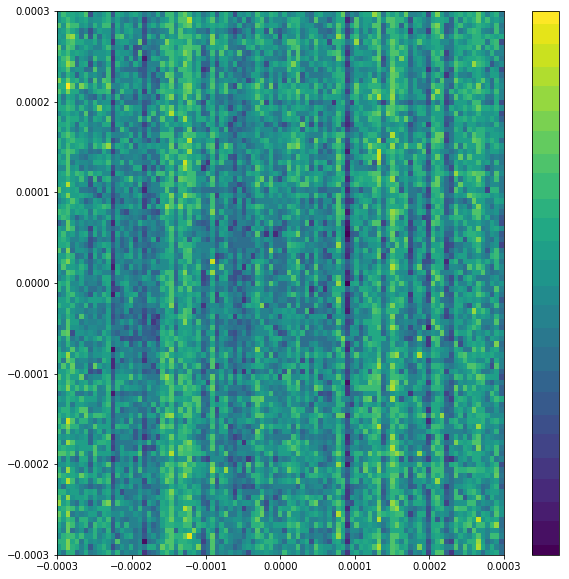

In [43]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
#plt.imshow(t,cmap='Oranges',extent=[-0.0003,0.0003,-0.0003,0.0003])
#plt.colorbar()
plt.pcolor(xx, yy, t)
plt.colorbar()
#plt.scatter(0.00025 , -0.000125,marker='^',color='b')
#plt.grid()
#plt.xlabel("Theta_1")
#plt.ylabel("Theta_2")

In [ ]:
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(t,cmap='Oranges', extent=[-1,1, -1,1])
plt.colorbar()
plt.scatter(0.00025 , -0.000125)
plt.xlabel("Theta_1")
plt.ylabel("Theta_2")

In [ ]:
print(h2_molecule.ccsd_energy)

In [ ]:
z=ofc.optimization.OptimizationResult(result.optimal_value,result.optimal_parameters)
print(z)

In [ ]:
print(z.num_evaluations)

In [ ]:
x=ofc.optimization.OptimizationTrialResult(result.optimal_value,result.optimal_parameters)